In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Generar datos aleatorios
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, random_state=65)
print("datos aleatorios X",X)
print("                    ")
print("datos aleatorios y",y)


datos aleatorios X [[-0.57887273 -0.50907044]
 [ 0.49936125  1.75202871]
 [-0.48566653 -0.70720997]
 [-0.56533701  2.35272774]
 [ 1.52693136  0.62991171]
 [ 0.91458004  0.9886294 ]
 [ 0.53076283  1.2170403 ]
 [-1.09708466 -1.21332314]
 [ 1.02802869  0.94252031]
 [ 1.23128554  1.01928702]
 [-0.51051899 -0.15437643]
 [-0.36219084  1.72875454]
 [ 0.72158292  1.26693069]
 [-0.38273271 -0.37478947]
 [-1.56896978 -1.70966838]
 [-1.62020737 -1.98830015]
 [ 0.89869186  0.88310335]
 [ 2.14724216 -0.14231407]
 [ 1.06186632  0.84683915]
 [ 0.58367297  1.33089245]
 [ 0.31394727  1.10852945]
 [-1.03294908  2.45398348]
 [-2.18468156 -2.33533904]
 [ 0.05754147  1.56465376]
 [-0.10207651 -0.51852455]
 [ 2.82158187 -0.1039024 ]
 [ 0.694065    1.21238602]
 [ 1.4638554   0.56911019]
 [-1.00469665 -0.74314985]
 [ 1.97078465  0.77727839]
 [-1.03264972 -1.28328189]
 [ 1.53913622  0.34260917]
 [ 1.83530805  0.42617277]
 [ 1.8938216   0.51896013]
 [-0.73317159 -0.92744779]
 [-1.52006507 -1.52195492]
 [-1.5706

In [2]:
# Entrenar el modelo SVM
model = svm.SVC(kernel='linear')
model.fit(X, y)


SVC(kernel='linear')

In [3]:
# Función para graficar los puntos de datos y el hiperplano
def plot_data_with_hyperplane(X, y, model):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    
    # Obtener límites de los ejes
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Generar grid para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    XX, YY = np.meshgrid(xx, yy)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    
    # Graficar el hiperplano y los márgenes
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()


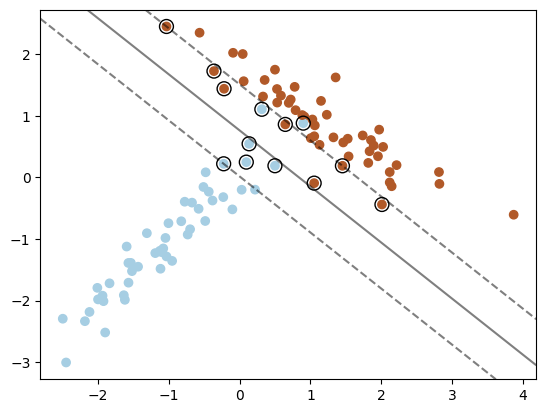

In [4]:
# Graficar los datos y el hiperplano
plot_data_with_hyperplane(X, y, model)


In [3]:
# Generar nuevas muestras para predecir
new_samples, _ = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, 
                                     n_clusters_per_class=1, random_state=65)

# Realizar predicciones en las nuevas muestras
predictions = model.predict(new_samples)
print("Predicciones:", predictions)


NameError: name 'make_classification' is not defined

In [6]:
# Calcular el porcentaje de exactitud
correct_predictions = np.sum(predictions == y)
accuracy = correct_predictions / len(y)
print("Porcentaje de exactitud:", accuracy * 100)

Porcentaje de exactitud: 98.0
